In [2]:
!pip install spacy

In [3]:
!pip install wordcloud

In [4]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re 

# Extracting reviews from Ecommerce website

In [47]:
########### Extracting reviews from online website ##############

iphone_reviews=[]
url1 = "https://www.snapdeal.com/product/apple-iphone-5c-16-gb/988871559/reviews?page="
url2 = "&sortBy=RECENCY&vsrc=rcnt#defRevPDP"

for i in range(1,10):
    ip=[]  
    base_url = url1+str(i)+url2
    response = requests.get(base_url)
    soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
    temp = soup.findAll("div",attrs={"class","user-review"})# Extracting the content under specific tags  
    for j in range(len(temp)):
        ip.append(temp[j].find("p").text)
    iphone_reviews=iphone_reviews+ip  # adding the reviews of one page to empty list which in future contains all the reviews

In [48]:
iphone_reviews

['Amazing product at this price....At first I was reluctant to buy an apple product from snapdeal but the deal made me crazy n I ordered with fingers cr \xa0read more ',
 "It's cool phone, good processing with latest iOS. The cons are: Low memory space. There is total 8 gb space, and almost 6 gb are already filled u \xa0read more  ",
 'Best phone my iPhone',
 'Good phone',
 'The product supplied by Snapdeal is very good at best price. It is as shown',
 'I am really happy with product',
 "I'm also happy with Snapdeal service",
 'goood.. fast shipping',
 'dream come true',
 "The OS will take around 5GB, leaving only 3 GB for your files. Unless you're not a heavy files user.",
 'it is simple \nall the thing that u need it having it \nI have buy it 2 year before from snapdeal and still it is in perfect condition.\nno lagging till today\nsuitable for your business need.',
 'Its an awesome phone',
 'Amazing product at this price....At first I was reluctant to buy an apple product from snapde

In [49]:
### Removing repeated reviews 
iphone_reviews = list(set(iphone_reviews))

In [50]:
iphone_reviews

['Good buy at an affordable price during the sale.',
 'I M Happy With iphone5c and snapdeal services. i would recommended Snapdeal service my near & dear',
 "Honestly speaking initially I was hesitated because of previous reviews about snapdeal. But those all reviews are fake and just to damage the reputation of snapdeal. I am truely satisfied by snapdeal's service. 100% satisfactory. Genuine product with honest service. So don't believe on rumours. I am going with five stars. Thanks snapdeal for wonderful shopping experience.",
 'Great product at such amazing price. Delivery was fast. N iPhone is amazing.',
 'Pros : Picture quality is awesome, sound with hearing ad is good, look and feel is good \n \ncons: You cannot transfer files using bluetooth from andriod/blackberry/windows to iphone, You have to use some file transfer app like shareit.\n\nOther is good. I am new to iphone so till now this is it.\n\niPhone 5c + Snapdeal before time delivery = 4 stars',
 "D phone is good. IOS is d

In [51]:
# Writing reviews into text file 
with open("ip_reviews.txt","w",encoding="utf-8") as snp:
    snp.write(str(iphone_reviews))

In [52]:
iphone_reviews

['Good buy at an affordable price during the sale.',
 'I M Happy With iphone5c and snapdeal services. i would recommended Snapdeal service my near & dear',
 "Honestly speaking initially I was hesitated because of previous reviews about snapdeal. But those all reviews are fake and just to damage the reputation of snapdeal. I am truely satisfied by snapdeal's service. 100% satisfactory. Genuine product with honest service. So don't believe on rumours. I am going with five stars. Thanks snapdeal for wonderful shopping experience.",
 'Great product at such amazing price. Delivery was fast. N iPhone is amazing.',
 'Pros : Picture quality is awesome, sound with hearing ad is good, look and feel is good \n \ncons: You cannot transfer files using bluetooth from andriod/blackberry/windows to iphone, You have to use some file transfer app like shareit.\n\nOther is good. I am new to iphone so till now this is it.\n\niPhone 5c + Snapdeal before time delivery = 4 stars',
 "D phone is good. IOS is d

In [53]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import nltk
%matplotlib inline 

In [54]:
ip_reviews=pd.read_csv('ip_reviews.txt',encoding='Latin-1')
ip_reviews

,['Good buy at an affordable price during the sale.','I M Happy With iphone5c and snapdeal services. i would recommended Snapdeal service my near & dear',"""Honestly speaking initially I was hesitated because of previous reviews about snapdeal. But those all reviews are fake and just to damage the reputation of snapdeal. I am truely satisfied by snapdeal's service. 100% satisfactory. Genuine product with honest service. So don't believe on rumours. I am going with five stars. Thanks snapdeal for wonderful shopping experience.""",'Great product at such amazing price. Delivery was fast. N iPhone is amazing.','Pros : Picture quality is awesome,sound with hearing ad is good,look and feel is good \n \ncons: You cannot transfer files using bluetooth from andriod/blackberry/windows to iphone,You have to use some file transfer app like shareit.\n\nOther is good. I am new to iphone so till now this is it.\n\niPhone 5c + Snapdeal before time delivery = 4 stars',"""D phone is good. IOS is d best OS.... Safe also. D phone looks great though it consists plastic body. Metal body looks good bt dt nt means plastic body looks cheap plastic may also b nice in looks. Its camera is superb. Battery also. Dere is only one problem nd dat is space... Bt I can't say dis is d phone's problem at all. I hv chosen d 8gb phone so it's my flaw. But in 1 word i just can say it is d best phone in dis price. Thumbs up APPLE""","""It's cool phone",...,'Good Price. Great Seller. Genuine Product. Fast Shipping. Recommended*****','Very good service by seller. Faster delivery and proper packing.','genuine product delivered within scheduled timframe. Thanks snapdeal !','Service quality is very good and level of interactions have been good.','dream come true','The product quality is good but the only thing is memory capacity is not sufficient for storing the data','A mush have deal','I have got ths phone in perfect condition and thank you snapdeal for perfect elivery.i guess ur are earning the trust back','I am happy with my new Iphone. Thanks you for providing me with the product of my choice with the best deal.','The 5C was delivered in a sealed box - crisp and brand new ! super deal.']


# Text Preprocessing

In [55]:
# Joining the list into one string/text
ip_reviews = ' '.join(ip_reviews)
ip_reviews

'[\'Good buy at an affordable price during the sale.\'  \'I M Happy With iphone5c and snapdeal services. i would recommended Snapdeal service my near & dear\'  "Honestly speaking initially I was hesitated because of previous reviews about snapdeal. But those all reviews are fake and just to damage the reputation of snapdeal. I am truely satisfied by snapdeal\'s service. 100% satisfactory. Genuine product with honest service. So don\'t believe on rumours. I am going with five stars. Thanks snapdeal for wonderful shopping experience."  \'Great product at such amazing price. Delivery was fast. N iPhone is amazing.\'  \'Pros : Picture quality is awesome  sound with hearing ad is good  look and feel is good \\n \\ncons: You cannot transfer files using bluetooth from andriod/blackberry/windows to iphone  You have to use some file transfer app like shareit.\\n\\nOther is good. I am new to iphone so till now this is it.\\n\\niPhone 5c + Snapdeal before time delivery = 4 stars\'  "D phone is go

In [56]:
# Remove Punctuations 
no_punc_text=ip_reviews.translate(str.maketrans('','',string.punctuation))#with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'Good buy at an affordable price during the sale  I M Happy With iphone5c and snapdeal services i would recommended Snapdeal service my near  dear  Honestly speaking initially I was hesitated because of previous reviews about snapdeal But those all reviews are fake and just to damage the reputation of snapdeal I am truely satisfied by snapdeals service 100 satisfactory Genuine product with honest service So dont believe on rumours I am going with five stars Thanks snapdeal for wonderful shopping experience  Great product at such amazing price Delivery was fast N iPhone is amazing  Pros  Picture quality is awesome  sound with hearing ad is good  look and feel is good n ncons You cannot transfer files using bluetooth from andriodblackberrywindows to iphone  You have to use some file transfer app like shareitnnOther is good I am new to iphone so till now this is itnniPhone 5c  Snapdeal before time delivery  4 stars  D phone is good IOS is d best OS Safe also D phone looks great though it 

In [57]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'Good buy at an affordable price during the sale  I M Happy With iphone5c and snapdeal services i would recommended Snapdeal service my near  dear  Honestly speaking initially I was hesitated because of previous reviews about snapdeal But those all reviews are fake and just to damage the reputation of snapdeal I am truely satisfied by snapdeals service 100 satisfactory Genuine product with honest service So dont believe on rumours I am going with five stars Thanks snapdeal for wonderful shopping experience  Great product at such amazing price Delivery was fast N iPhone is amazing  Pros  Picture quality is awesome  sound with hearing ad is good  look and feel is good n ncons You cannot transfer files using bluetooth from andriodblackberrywindows to iphone  You have to use some file transfer app like shareitnnOther is good I am new to iphone so till now this is itnniPhone 5c  Snapdeal before time delivery  4 stars  D phone is good IOS is d best OS Safe also D phone looks great though it 

In [60]:
#Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [61]:
text_tokens = word_tokenize(no_url_text)
print(text_tokens)

['Good', 'buy', 'at', 'an', 'affordable', 'price', 'during', 'the', 'sale', 'I', 'M', 'Happy', 'With', 'iphone5c', 'and', 'snapdeal', 'services', 'i', 'would', 'recommended', 'Snapdeal', 'service', 'my', 'near', 'dear', 'Honestly', 'speaking', 'initially', 'I', 'was', 'hesitated', 'because', 'of', 'previous', 'reviews', 'about', 'snapdeal', 'But', 'those', 'all', 'reviews', 'are', 'fake', 'and', 'just', 'to', 'damage', 'the', 'reputation', 'of', 'snapdeal', 'I', 'am', 'truely', 'satisfied', 'by', 'snapdeals', 'service', '100', 'satisfactory', 'Genuine', 'product', 'with', 'honest', 'service', 'So', 'dont', 'believe', 'on', 'rumours', 'I', 'am', 'going', 'with', 'five', 'stars', 'Thanks', 'snapdeal', 'for', 'wonderful', 'shopping', 'experience', 'Great', 'product', 'at', 'such', 'amazing', 'price', 'Delivery', 'was', 'fast', 'N', 'iPhone', 'is', 'amazing', 'Pros', 'Picture', 'quality', 'is', 'awesome', 'sound', 'with', 'hearing', 'ad', 'is', 'good', 'look', 'and', 'feel', 'is', 'good', 

In [62]:
len(text_tokens) 

1573

In [63]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
my_stop_words = stopwords.words('english')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [65]:
len(my_stop_words)

179

In [67]:
sw_list = ['rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:100]) 

['Good', 'buy', 'affordable', 'price', 'sale', 'M', 'Happy', 'With', 'iphone5c', 'snapdeal', 'services', 'would', 'recommended', 'Snapdeal', 'service', 'near', 'dear', 'Honestly', 'speaking', 'initially', 'hesitated', 'previous', 'reviews', 'snapdeal', 'But', 'reviews', 'fake', 'damage', 'reputation', 'snapdeal', 'truely', 'satisfied', 'snapdeals', 'service', '100', 'satisfactory', 'Genuine', 'product', 'honest', 'service', 'So', 'dont', 'believe', 'rumours', 'going', 'five', 'stars', 'Thanks', 'snapdeal', 'wonderful', 'shopping', 'experience', 'Great', 'product', 'amazing', 'price', 'Delivery', 'fast', 'N', 'iPhone', 'amazing', 'Pros', 'Picture', 'quality', 'awesome', 'sound', 'hearing', 'ad', 'good', 'look', 'feel', 'good', 'n', 'ncons', 'You', 'transfer', 'files', 'using', 'bluetooth', 'andriodblackberrywindows', 'iphone', 'You', 'use', 'file', 'transfer', 'app', 'like', 'shareitnnOther', 'good', 'new', 'iphone', 'till', 'itnniPhone', '5c', 'Snapdeal', 'time', 'delivery', '4', 'star

In [68]:
len(no_stop_tokens)

1017

In [69]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:100])

['good', 'buy', 'affordable', 'price', 'sale', 'm', 'happy', 'with', 'iphone5c', 'snapdeal', 'services', 'would', 'recommended', 'snapdeal', 'service', 'near', 'dear', 'honestly', 'speaking', 'initially', 'hesitated', 'previous', 'reviews', 'snapdeal', 'but', 'reviews', 'fake', 'damage', 'reputation', 'snapdeal', 'truely', 'satisfied', 'snapdeals', 'service', '100', 'satisfactory', 'genuine', 'product', 'honest', 'service', 'so', 'dont', 'believe', 'rumours', 'going', 'five', 'stars', 'thanks', 'snapdeal', 'wonderful', 'shopping', 'experience', 'great', 'product', 'amazing', 'price', 'delivery', 'fast', 'n', 'iphone', 'amazing', 'pros', 'picture', 'quality', 'awesome', 'sound', 'hearing', 'ad', 'good', 'look', 'feel', 'good', 'n', 'ncons', 'you', 'transfer', 'files', 'using', 'bluetooth', 'andriodblackberrywindows', 'iphone', 'you', 'use', 'file', 'transfer', 'app', 'like', 'shareitnnother', 'good', 'new', 'iphone', 'till', 'itnniphone', '5c', 'snapdeal', 'time', 'delivery', '4', 'star

In [70]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:100]) 

['good', 'buy', 'afford', 'price', 'sale', 'm', 'happi', 'with', 'iphone5c', 'snapdeal', 'servic', 'would', 'recommend', 'snapdeal', 'servic', 'near', 'dear', 'honestli', 'speak', 'initi', 'hesit', 'previou', 'review', 'snapdeal', 'but', 'review', 'fake', 'damag', 'reput', 'snapdeal', 'trueli', 'satisfi', 'snapdeal', 'servic', '100', 'satisfactori', 'genuin', 'product', 'honest', 'servic', 'so', 'dont', 'believ', 'rumour', 'go', 'five', 'star', 'thank', 'snapdeal', 'wonder', 'shop', 'experi', 'great', 'product', 'amaz', 'price', 'deliveri', 'fast', 'n', 'iphon', 'amaz', 'pro', 'pictur', 'qualiti', 'awesom', 'sound', 'hear', 'ad', 'good', 'look', 'feel', 'good', 'n', 'ncon', 'you', 'transfer', 'file', 'use', 'bluetooth', 'andriodblackberrywindow', 'iphon', 'you', 'use', 'file', 'transfer', 'app', 'like', 'shareitnnoth', 'good', 'new', 'iphon', 'till', 'itnniphon', '5c', 'snapdeal', 'time', 'deliveri', '4', 'star', 'd']


In [59]:
!pip install en_core_web_sm
!python -m spacy download en_core_web_sm  

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.5.0/en_core_web_sm-3.5.0-py3-none-any.whl (12.8 MB)


2023-02-25 01:18:32.558323: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-02-25 01:18:32.558399: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-25 01:18:39.926693: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2023-02-25 01:18:39.926747: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-25 01:18:39.933551: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: DESKTOP-U5P6994
2023-02-25 01:18:39.933814: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: DESKTOP-U5P6994


[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [71]:
# Lemmatization
import spacy
from spacy.lang.en.examples import sentences
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

good buy affordable price sale m happy with iphone5c snapdeal services would recommended snapdeal service near dear honestly speaking initially hesitated previous reviews snapdeal but reviews fake damage reputation snapdeal truely satisfied snapdeals service 100 satisfactory genuine product honest service so dont believe rumours going five stars thanks snapdeal wonderful shopping experience great product amazing price delivery fast n iphone amazing pros picture quality awesome sound hearing ad good look feel good n ncons you transfer files using bluetooth andriodblackberrywindows iphone you use file transfer app like shareitnnother good new iphone till itnniphone 5c snapdeal time delivery 4 stars d phone good ios best os safe also d phone looks great though consists plastic body metal body looks good bt dt nt means plastic body looks cheap plastic may also b nice looks its camera superb battery also dere one problem nd dat space bt cant say dis phones problem hv chosen 8gb phone flaw b

In [72]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:100])

['good', 'buy', 'affordable', 'price', 'sale', 'm', 'happy', 'with', 'iphone5c', 'snapdeal', 'service', 'would', 'recommend', 'snapdeal', 'service', 'near', 'dear', 'honestly', 'speak', 'initially', 'hesitate', 'previous', 'review', 'snapdeal', 'but', 'review', 'fake', 'damage', 'reputation', 'snapdeal', 'truely', 'satisfied', 'snapdeal', 'service', '100', 'satisfactory', 'genuine', 'product', 'honest', 'service', 'so', 'do', 'not', 'believe', 'rumour', 'go', 'five', 'star', 'thank', 'snapdeal', 'wonderful', 'shopping', 'experience', 'great', 'product', 'amazing', 'price', 'delivery', 'fast', 'n', 'iphone', 'amazing', 'pro', 'picture', 'quality', 'awesome', 'sound', 'hear', 'ad', 'good', 'look', 'feel', 'good', 'n', 'ncon', 'you', 'transfer', 'file', 'use', 'bluetooth', 'andriodblackberrywindow', 'iphone', 'you', 'use', 'file', 'transfer', 'app', 'like', 'shareitnnother', 'good', 'new', 'iphone', 'till', 'itnniphone', '5c', 'snapdeal', 'time', 'delivery', '4', 'star']


In [73]:
clean_reviews=' '.join(lemmas)
clean_reviews

'good buy affordable price sale m happy with iphone5c snapdeal service would recommend snapdeal service near dear honestly speak initially hesitate previous review snapdeal but review fake damage reputation snapdeal truely satisfied snapdeal service 100 satisfactory genuine product honest service so do not believe rumour go five star thank snapdeal wonderful shopping experience great product amazing price delivery fast n iphone amazing pro picture quality awesome sound hear ad good look feel good n ncon you transfer file use bluetooth andriodblackberrywindow iphone you use file transfer app like shareitnnother good new iphone till itnniphone 5c snapdeal time delivery 4 star d phone good io good os safe also d phone look great though consist plastic body metal body look good bt dt not mean plastic body look cheap plastic may also b nice look its camera superb battery also dere one problem nd dat space bt can not say dis phone problem hv choose 8 gb phone flaw but 1 word say good phone d

# Feature Extraction

# Using Count Vectorizer

In [74]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas) 

In [75]:
print(vectorizer.vocabulary_)

{'good': 143, 'buy': 54, 'affordable': 17, 'price': 255, 'sale': 297, 'happy': 152, 'with': 398, 'iphone5c': 174, 'snapdeal': 332, 'service': 310, 'would': 406, 'recommend': 290, 'near': 216, 'dear': 92, 'honestly': 161, 'speak': 339, 'initially': 166, 'hesitate': 159, 'previous': 254, 'review': 294, 'but': 53, 'fake': 122, 'damage': 86, 'reputation': 292, 'truely': 377, 'satisfied': 300, '100': 1, 'satisfactory': 299, 'genuine': 139, 'product': 263, 'honest': 160, 'so': 335, 'do': 103, 'not': 223, 'believe': 42, 'rumour': 295, 'go': 142, 'five': 132, 'star': 341, 'thank': 353, 'wonderful': 400, 'shopping': 319, 'experience': 121, 'great': 148, 'amazing': 23, 'delivery': 96, 'fast': 124, 'iphone': 173, 'pro': 260, 'picture': 247, 'quality': 276, 'awesome': 33, 'sound': 337, 'hear': 156, 'ad': 15, 'look': 192, 'feel': 126, 'ncon': 214, 'you': 409, 'transfer': 375, 'file': 127, 'use': 385, 'bluetooth': 44, 'andriodblackberrywindow': 25, 'app': 27, 'like': 188, 'shareitnnother': 315, 'new

In [76]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100]) 

['budget', 'build', 'business', 'but', 'buy', 'camera', 'can', 'capacity', 'care', 'category', 'cell', 'charge', 'cheap', 'choice', 'choose', 'class', 'close', 'colour', 'come', 'commit', 'compare', 'competitive', 'con', 'condition', 'conditionnno', 'consist', 'contact', 'cool', 'costly', 'coupon', 'courier', 'cr', 'crazy', 'credit', 'crisp', 'customer', 'damage', 'dat', 'datum', 'day', 'daynand', 'deal', 'dear', 'decide', 'defination', 'deliver', 'delivery', 'delivry', 'dere', 'dis']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [77]:
print(X.toarray().shape)

(1028, 410)


# CountVectorizer with N-grams (Bigrams & Trigrams)

In [78]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(lemmas) 

In [79]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['100', '5c', 'also', 'always', 'amazing', 'and', 'apple', 'awesome', 'body', 'brand', 'bt', 'budget', 'but', 'buy', 'camera', 'cheap', 'come', 'condition', 'day', 'deal', 'deliver', 'delivery', 'do', 'even', 'everyone', 'excellent', 'experience', 'fast', 'feature', 'feel', 'file', 'fill', 'free', 'gb', 'genuine', 'get', 'go', 'good', 'got', 'great', 'happy', 'interest', 'io', 'ios', 'iphone', 'issue', 'it', 'its', 'late', 'like', 'look', 'low', 'memory', 'mobile', 'need', 'new', 'nice', 'not', 'offer', 'one', 'order', 'original', 'pack', 'perfect', 'phone', 'plastic', 'price', 'problem', 'product', 'quality', 'rate', 'really', 'receive', 'recommend', 'satisfied', 'seller', 'service', 'shipping', 'site', 'smooth', 'snap', 'snapdeal', 'so', 'space', 'superb', 'take', 'thank', 'the', 'this', 'though', 'till', 'time', 'transfer', 'use', 'very', 'want', 'within', 'worth', 'would', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0

# TF-IDF Vectorizer

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidfv_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tfidf_matrix_n_gram_max_features =Tfidfv_n_gram_max_features.fit_transform(lemmas)
print(Tfidfv_n_gram_max_features.get_feature_names())
print(tfidf_matrix_n_gram_max_features.toarray()) 

['10', '100', '1000rs', '2030', '20k', '24', '2nd', '5c', '5cnnsnapdeal', '6s', '9nncons', 'absolutly', 'accessory', 'account', 'action', 'ad', 'adorable', 'affordable', 'after', 'almost', 'already', 'also', 'always', 'amazing', 'and', 'andriodblackberrywindow', 'android', 'app', 'apple', 'around', 'as', 'attractive', 'available', 'awesome', 'awesum', 'awsme', 'awwsum', 'back', 'battery', 'be', 'beatifully', 'beautiful', 'believe', 'bit', 'bluetooth', 'body', 'bodyn2', 'box', 'brand', 'bt', 'budget', 'build', 'business', 'but', 'buy', 'camera', 'can', 'capacity', 'care', 'category', 'cell', 'charge', 'cheap', 'choice', 'choose', 'class', 'close', 'colour', 'come', 'commit', 'compare', 'competitive', 'con', 'condition', 'conditionnno', 'consist', 'contact', 'cool', 'costly', 'coupon', 'courier', 'cr', 'crazy', 'credit', 'crisp', 'customer', 'damage', 'dat', 'datum', 'day', 'daynand', 'deal', 'dear', 'decide', 'defination', 'deliver', 'delivery', 'delivry', 'dere', 'dis', 'discount', 'di

# Generate WordCloud

In [81]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off"); 

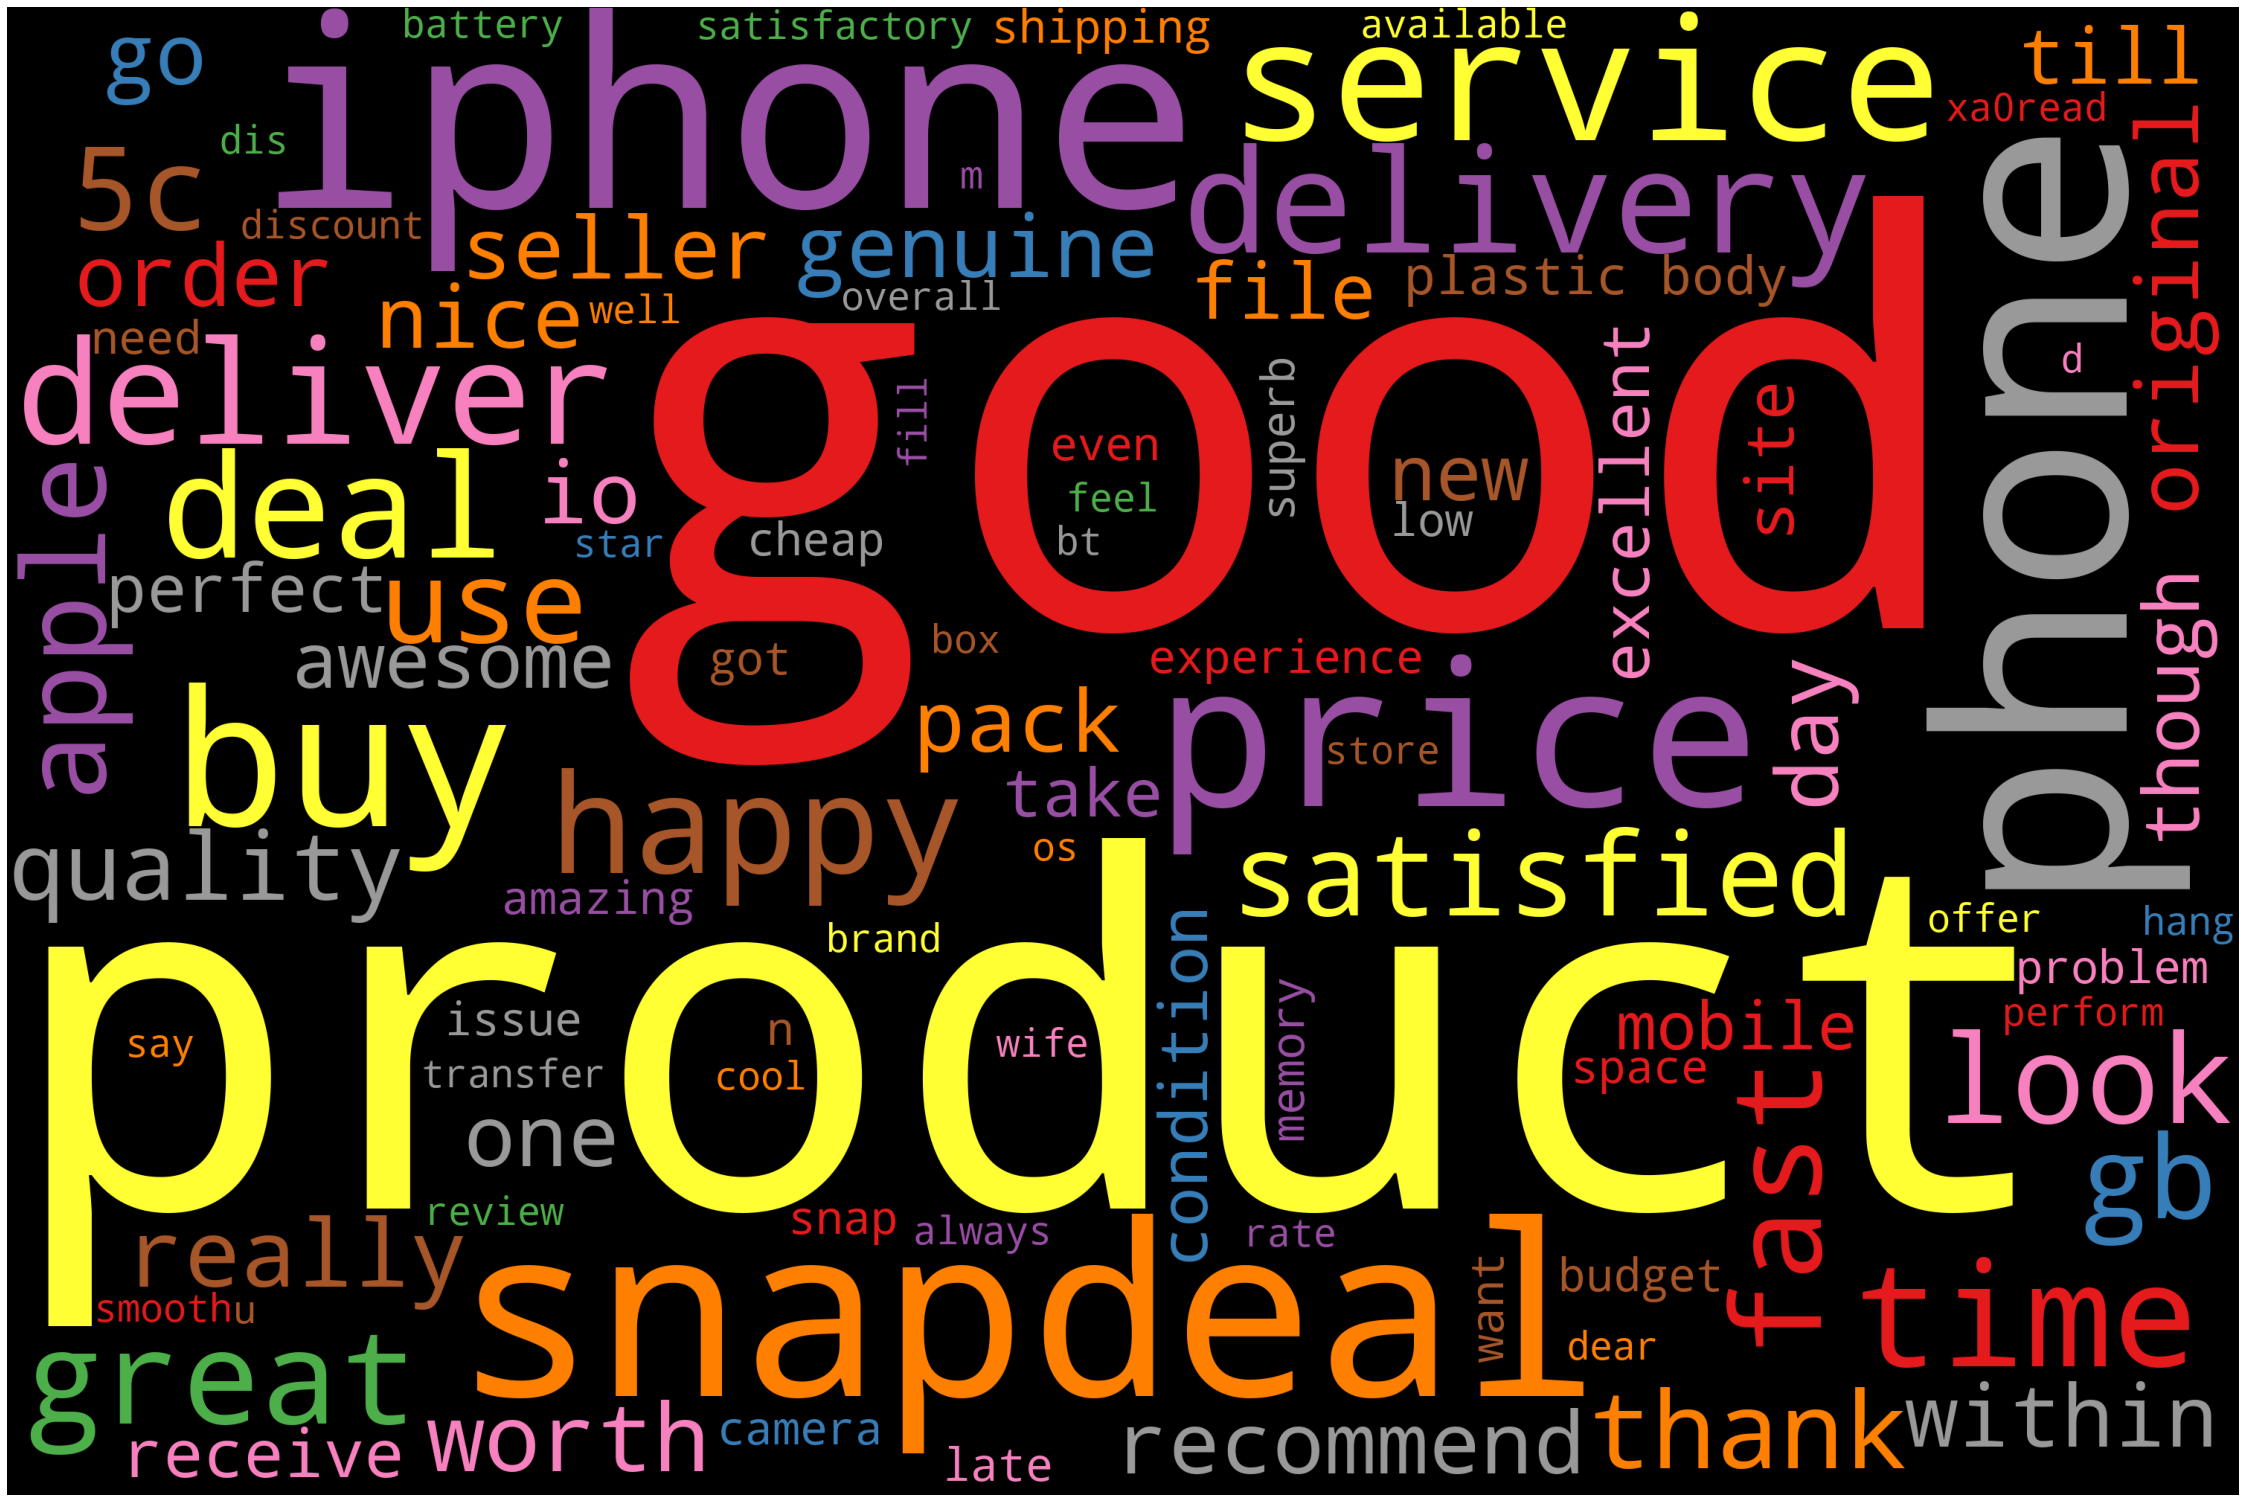

In [82]:
# Generate wordcloud
stopwords = STOPWORDS
STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set1',stopwords=stopwords).generate(clean_reviews)
# Plot
plot_cloud(wordcloud)

# Named Entity Recognition (NER)

In [83]:
##Part Of Speech Tagging
nlp = spacy.load('en_core_web_sm')


In [84]:
one_block = clean_reviews
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True) 

In [85]:
one_block

'good buy affordable price sale m happy with iphone5c snapdeal service would recommend snapdeal service near dear honestly speak initially hesitate previous review snapdeal but review fake damage reputation snapdeal truely satisfied snapdeal service 100 satisfactory genuine product honest service so do not believe rumour go five star thank snapdeal wonderful shopping experience great product amazing price delivery fast n iphone amazing pro picture quality awesome sound hear ad good look feel good n ncon you transfer file use bluetooth andriodblackberrywindow iphone you use file transfer app like shareitnnother good new iphone till itnniphone 5c snapdeal time delivery 4 star d phone good io good os safe also d phone look great though consist plastic body metal body look good bt dt not mean plastic body look cheap plastic may also b nice look its camera superb battery also dere one problem nd dat space bt can not say dis phone problem hv choose 8 gb phone flaw but 1 word say good phone d

In [86]:
for token in doc_block[0:20]:
    print(token, token.pos_) 

good ADJ
buy VERB
affordable ADJ
price NOUN
sale NOUN
m VERB
happy ADJ
with ADP
iphone5c ADJ
snapdeal ADJ
service NOUN
would AUX
recommend VERB
snapdeal ADJ
service NOUN
near ADP
dear PROPN
honestly ADV
speak VERB
initially ADV


In [87]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['recommend', 'service', 'speak', 'hesitate', 'review', 'review', 'damage', 'reputation', 'service', 'product', 'service', 'believe', 'rumour', 'go', 'star', 'thank', 'shopping', 'experience', 'product', 'price']


In [88]:
#Counting noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:20] 

,word,count
0,product,40
1,phone,28
2,iphone,26
3,price,17
4,buy,15
5,service,12
6,delivery,11
7,time,11
8,deliver,11
9,deal,11


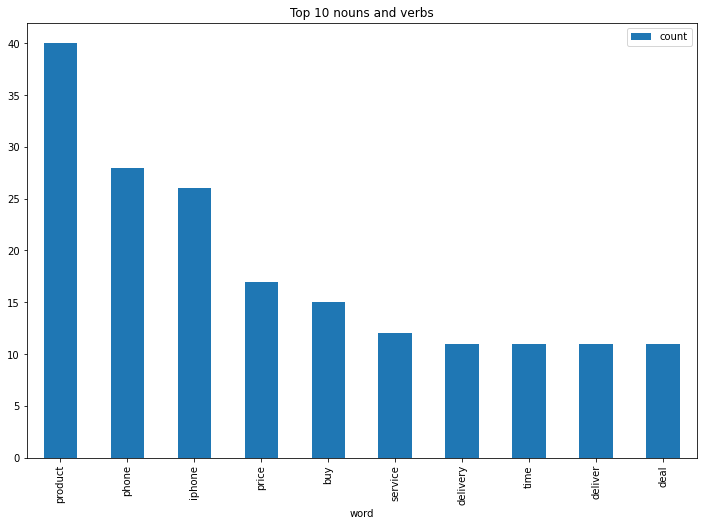

In [89]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wf_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

# Emotion Mining

In [92]:
## Sentiment Analysis
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(iphone_reviews))
sentences[0:50] 

['Good buy at an affordable price during the sale.',
 'I M Happy With iphone5c and snapdeal services.',
 'i would recommended Snapdeal service my near & dear Honestly speaking initially I was hesitated because of previous reviews about snapdeal.',
 'But those all reviews are fake and just to damage the reputation of snapdeal.',
 "I am truely satisfied by snapdeal's service.",
 '100% satisfactory.',
 'Genuine product with honest service.',
 "So don't believe on rumours.",
 'I am going with five stars.',
 'Thanks snapdeal for wonderful shopping experience.',
 'Great product at such amazing price.',
 'Delivery was fast.',
 'N iPhone is amazing.',
 'Pros : Picture quality is awesome, sound with hearing ad is good, look and feel is good \n \ncons: You cannot transfer files using bluetooth from andriod/blackberry/windows to iphone, You have to use some file transfer app like shareit.',
 'Other is good.',
 'I am new to iphone so till now this is it.',
 'iPhone 5c + Snapdeal before time delive

In [93]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,Good buy at an affordable price during the sale.
1,I M Happy With iphone5c and snapdeal services.
2,i would recommended Snapdeal service my near &...
3,But those all reviews are fake and just to dam...
4,I am truely satisfied by snapdeal's service.
...,...
121,Service quality is very good and level of inte...
122,dream come true The product quality is good bu...
123,Thanks you for providing me with the product o...
124,The 5C was delivered in a sealed box - crisp a...


In [94]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [95]:
affinity_scores = affin.set_index('word')['value'].to_dict() 
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [96]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [110]:
# test that it works
calculate_sentiment(text = 'thank') 

2

In [98]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment) 

In [99]:
sent_df['sentiment_value']

0       3
1       0
2       2
3      -6
4       0
       ..
121     6
122    16
123     5
124     0
125     3
Name: sentiment_value, Length: 126, dtype: int64

In [100]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0       9
1       8
2      21
3      14
4       7
       ..
121    12
122    55
123    15
124    14
125     2
Name: word_count, Length: 126, dtype: int64

In [101]:
sent_df

,sentence,sentiment_value,word_count
0,Good buy at an affordable price during the sale.,3,9
1,I M Happy With iphone5c and snapdeal services.,0,8
2,i would recommended Snapdeal service my near &...,2,21
3,But those all reviews are fake and just to dam...,-6,14
4,I am truely satisfied by snapdeal's service.,0,7
...,...,...,...
121,Service quality is very good and level of inte...,6,12
122,dream come true The product quality is good bu...,16,55
123,Thanks you for providing me with the product o...,5,15
124,The 5C was delivered in a sealed box - crisp a...,0,14


In [102]:
sent_df.sort_values(by='sentiment_value').tail(10) 

,sentence,sentiment_value,word_count
46,"Good price, Great phone, very happy to own one.",9,9
35,"Superb model , snapdeal delivered as promised ...",11,19
92,i bought iphone 5c from snapdeal and the produ...,11,56
63,Everyone should go with this phone if you have...,12,59
13,"Pros : Picture quality is awesome, sound with ...",12,38
88,Price and delivery service are good I received...,13,36
44,"Good , product is satisfied which I got from S...",16,44
122,dream come true The product quality is good bu...,16,55
50,Best phone my iPhone I am really happy with pr...,20,74
41,"offer product is available, customer care also...",28,65


In [103]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe() 

count    126.000000
mean       2.928571
std        4.569776
min       -6.000000
25%        0.000000
50%        2.000000
75%        4.000000
max       28.000000
Name: sentiment_value, dtype: float64

In [104]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head() 

,sentence,sentiment_value,word_count
1,I M Happy With iphone5c and snapdeal services.,0,8
3,But those all reviews are fake and just to dam...,-6,14
4,I am truely satisfied by snapdeal's service.,0,7
5,100% satisfactory.,0,2
7,So don't believe on rumours.,0,5


In [105]:
sent_df[sent_df['sentiment_value']>=20].head() 

,sentence,sentiment_value,word_count
41,"offer product is available, customer care also...",28,65
50,Best phone my iPhone I am really happy with pr...,20,74


In [106]:
sent_df['index']=range(0,len(sent_df)) 

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

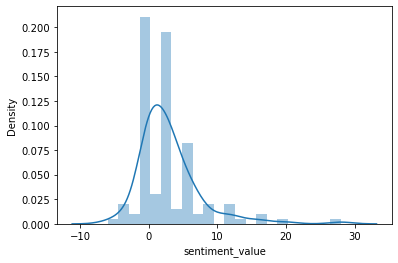

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value']) 

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

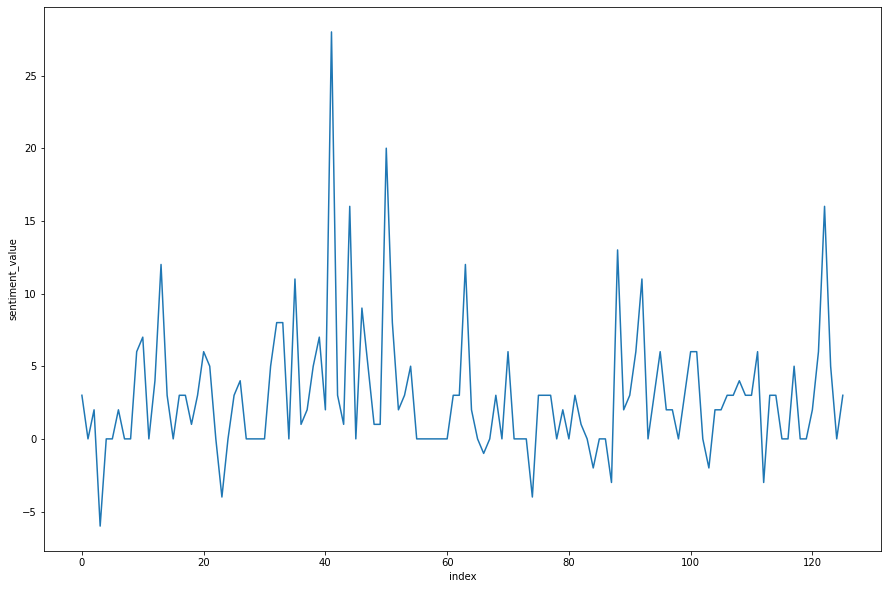

In [108]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df) 

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

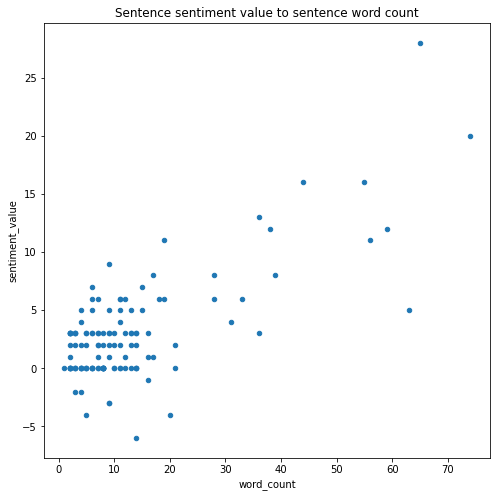

In [109]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')